In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [175]:
data = pd.read_csv('Processed Data LCS.csv')

In [176]:
X = data[['PM2.5_LCS']]
y = data['PM2.5_ref']

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [178]:
gb_regressor = GradientBoostingRegressor(
    n_estimators=1000,       # Increase the number of estimators
    learning_rate=0.001,     # Reduce the learning rate
    max_depth=10,            # Experiment with different max_depth values
    min_samples_split=2,    # Adjust min_samples_split
    min_samples_leaf=1,     # Adjust min_samples_leaf
    subsample=0.5           # Try a subsample fraction less than 1.0
)

In [179]:
gb_regressor.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.001, max_depth=10, n_estimators=1000,
                          subsample=0.5)

In [180]:
y_pred = gb_regressor.predict(X_test)

In [181]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [182]:
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2) Score: {r2}')

Mean Squared Error (MSE): 56.16731130071388
R-squared (R2) Score: 0.24980202878331337


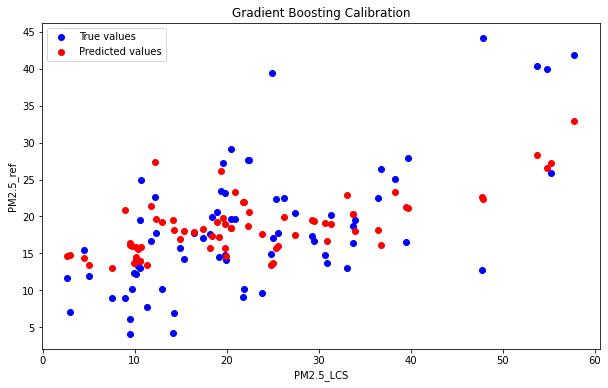

In [183]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='True values')
plt.scatter(X_test, y_pred, color='red', label='Predicted values')
plt.xlabel('PM2.5_LCS')
plt.ylabel('PM2.5_ref')
plt.legend()
plt.title('Gradient Boosting Calibration')
plt.show()